# **Sin(x) Project** 

## 	*Dagan Shoesmith and Michael Lyford*

In [100]:
#Import needed functions
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

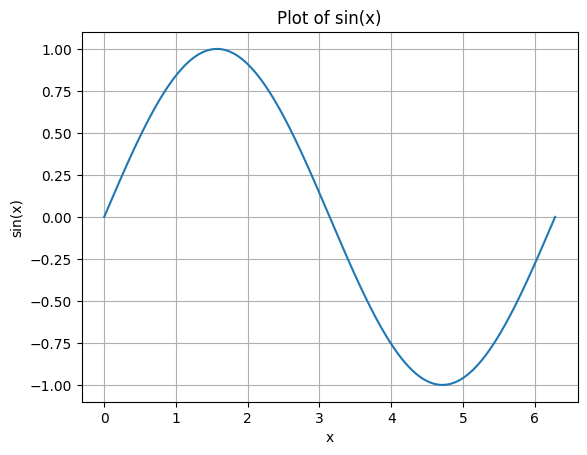

In [101]:
# Base function and data grid
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Plot of sin(x)
plt.plot(x, y, label='sin(x)')
plt.title('Plot of sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid()
plt.show()

### Fourier Series

In [102]:
# define fourier series sin(x) function

def fourier_series(f, x, n_terms):
    """
    Compute the Fourier series approximation of f(x) on [0, 2π]
    using n_terms sine and cosine components.
    """
    a0 = (1 / np.pi) * np.trapezoid(f(x), x)
    result = 0.5 * a0 * np.ones_like(x)
    for n in range(1, n_terms + 1):
        an = (1 / np.pi) * np.trapezoid(f(x) * np.cos(n * x), x)
        bn = (1 / np.pi) * np.trapezoid(f(x) * np.sin(n * x), x)
        result += an * np.cos(n * x) + bn * np.sin(n * x)
    return result

### Splines

In [103]:
# define spline approximation function for sin(x)

def splines_approximation(x_eval, n_segments):
    """
    Approximate sin(x) using cubic spline interpolation
    based on n_segments equally spaced sample points.
    """
    x_sample = np.linspace(0, 2 * np.pi, n_segments)
    y_sample = np.sin(x_sample)
    cs = CubicSpline(x_sample, y_sample)
    return cs(x_eval)

### Rational Function Interpolation

In [104]:
#define rational approximation function for sin(x)

def rational_approximation(x, degree):
    """
    Approximate sin(x) using a rational function P(x)/Q(x)
    of a given polynomial degree. Uses non-linear curve fitting.
    """
    def rational_func(x, *params):
        numerator = sum(params[i] * x**i for i in range(degree + 1))
        denominator = 1 + sum(params[i + degree + 1] * x**(i + 1) for i in range(degree))
        return numerator / denominator
    initial_params = np.ones(2 * degree + 1)
    params, _ = curve_fit(rational_func, x, np.sin(x), p0=initial_params, maxfev=5000)
    return rational_func(x, *params)

### Compare aproximations in one graph

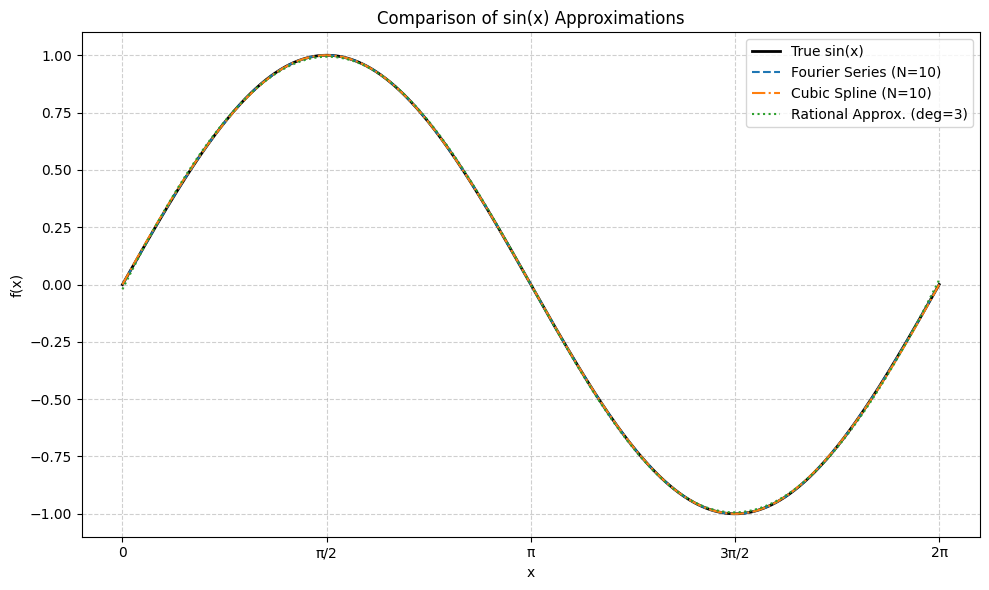

In [105]:
# Visual Comparison: sin(x) vs. Each Approximation

# Choose representative parameters for comparison
n_terms = 10        # Fourier terms
n_splines = 10      # Spline segments
degree_rational = 3 # Rational polynomial degree

# Compute each approximation
y_fourier = fourier_series(np.sin, x, n_terms)
y_spline = splines_approximation(x, n_splines)
y_rational = rational_approximation(x, degree_rational)

# Plot all approximations against the true sin(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True sin(x)', color='black', linewidth=2)
plt.plot(x, y_fourier, '--', label=f'Fourier Series (N={n_terms})', linewidth=1.5)
plt.plot(x, y_spline, '-.', label=f'Cubic Spline (N={n_splines})', linewidth=1.5)
plt.plot(x, y_rational, ':', label=f'Rational Approx. (deg={degree_rational})', linewidth=1.5)

# Format the x-axis to show π multiples
ticks = np.linspace(0, 2 * np.pi, 5)
tick_labels = ['0', 'π/2', 'π', '3π/2', '2π']
plt.xticks(ticks, tick_labels)

# Labels, title, and legend
plt.title('Comparison of sin(x) Approximations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Error Functions

In [106]:
def compute_rms_error(true_vals, approx_vals):
    """Compute RMS (Root Mean Square) error between arrays."""
    return np.sqrt(np.mean((true_vals - approx_vals)**2))

def compute_max_error(true_vals, approx_vals):
    """Compute maximum absolute error."""
    return np.max(np.abs(true_vals - approx_vals))

### Performance and Error Testing

In [107]:
# Set raange of complexities to test
complexity_range = range(2, 21)
results = []

fourier_rms, spline_rms, rational_rms = [], [], []

for n in complexity_range:
    # --- Fourier Series ---
    start = time.perf_counter()
    y_fourier = fourier_series(np.sin, x, n)
    t_fourier = time.perf_counter() - start
    e_fourier = compute_rms_error(y, y_fourier)

    # --- Splines ---
    start = time.perf_counter()
    y_spline = splines_approximation(x, n)
    t_spline = time.perf_counter() - start
    e_spline = compute_rms_error(y, y_spline)

    # --- Rational ---
    start = time.perf_counter()
    try:
        y_rational = rational_approximation(x, n)
        e_rational = compute_rms_error(y, y_rational)
    except Exception:
        e_rational = np.nan
    t_rational = time.perf_counter() - start

    # Store results
    results.append([n, e_fourier, t_fourier, e_spline, t_spline, e_rational, t_rational])
    fourier_rms.append(e_fourier)
    spline_rms.append(e_spline)
    rational_rms.append(e_rational)


In [108]:
# Convert results to DataFrame for readability
df = pd.DataFrame(results, columns=[
    "Complexity (N)",
    "Fourier RMS", "Fourier Time (s)",
    "Spline RMS", "Spline Time (s)",
    "Rational RMS", "Rational Time (s)"
])

print("=== Summary Table of Errors and Timings ===")
print(df.to_string(index=False, float_format='%.3e'))

=== Summary Table of Errors and Timings ===
 Complexity (N)  Fourier RMS  Fourier Time (s)  Spline RMS  Spline Time (s)  Rational RMS  Rational Time (s)
              2    3.522e-17         2.010e-04   7.068e-01        1.680e-04     1.846e-01          5.067e-03
              3    4.394e-17         1.752e-04   7.068e-01        1.627e-04     5.576e-03          8.240e-03
              4    4.613e-17         2.120e-04   1.403e-01        1.120e-04     4.636e-04          2.045e-02
              5    5.209e-17         2.718e-04   9.869e-02        1.117e-04     4.099e-06          5.003e-02
              6    5.284e-17         3.150e-04   3.085e-02        1.205e-04     1.373e-07          8.999e-02
              7    5.243e-17         3.532e-04   1.306e-02        1.240e-04     1.350e-07          1.010e-01
              8    5.211e-17         3.986e-04   5.873e-03        1.288e-04     1.891e-08          1.247e-01
              9    5.421e-17         4.682e-04   2.942e-03        1.183e-04     3.44

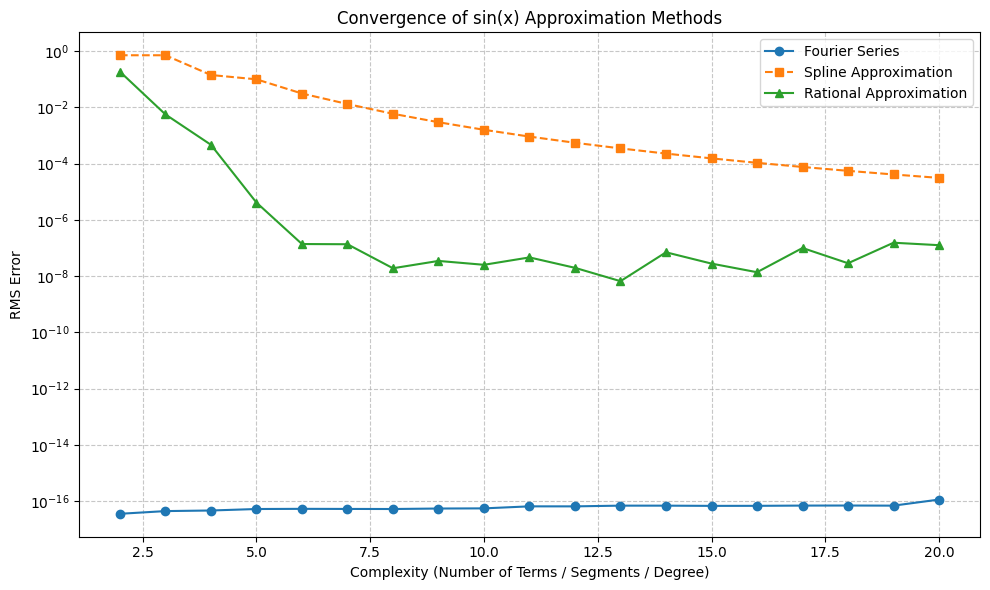

In [109]:
# Plot 1: Error vs Complexity for each method
plt.figure(figsize=(10, 6))
plt.semilogy(complexity_range, fourier_rms, 'o-', label='Fourier Series')
plt.semilogy(complexity_range, spline_rms, 's--', label='Spline Approximation')
plt.semilogy(complexity_range, rational_rms, '^-', label='Rational Approximation')
plt.xlabel('Complexity (Number of Terms / Segments / Degree)')
plt.ylabel('RMS Error')
plt.title('Convergence of sin(x) Approximation Methods')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pareto Effect

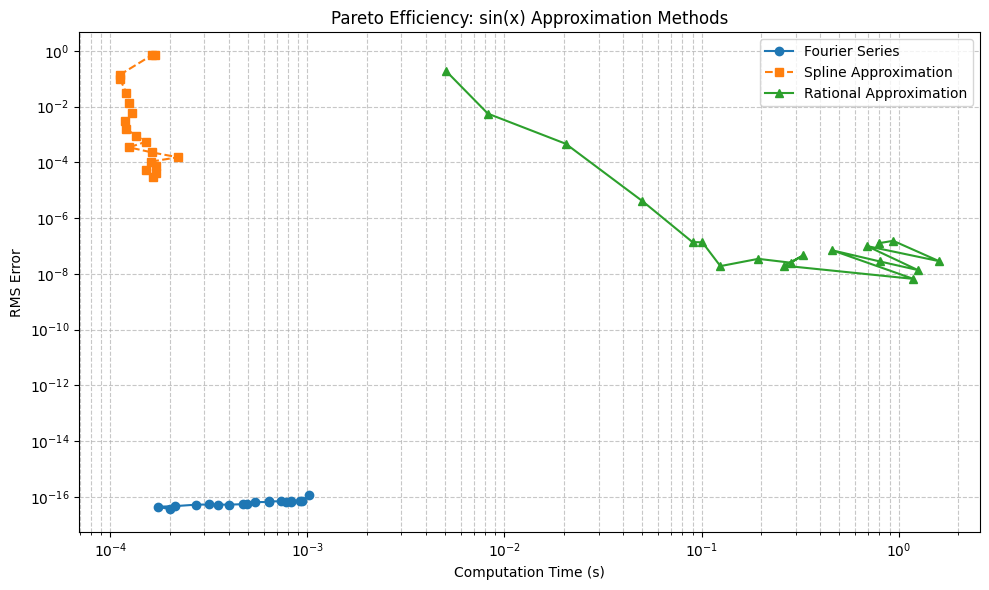

In [110]:
# Plot 2: Pareto Efficiency (RMS Error vs Computation Time)

fourier_times = df["Fourier Time (s)"].replace(0, 1e-6)
spline_times = df["Spline Time (s)"].replace(0, 1e-6)
rational_times = df["Rational Time (s)"].replace(0, 1e-6)

plt.figure(figsize=(10, 6))
plt.loglog(fourier_times, df["Fourier RMS"], 'o-', label='Fourier Series')
plt.loglog(spline_times, df["Spline RMS"], 's--', label='Spline Approximation')
plt.loglog(rational_times, df["Rational RMS"], '^-', label='Rational Approximation')
plt.xlabel('Computation Time (s)')
plt.ylabel('RMS Error')
plt.title('Pareto Efficiency: sin(x) Approximation Methods')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()